# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.074655e+01     7.575016e+00
 * time: 0.004556894302368164
     1     2.917026e+01     5.556699e+00
 * time: 0.013411998748779297
     2     2.428048e+01     6.892553e+00
 * time: 0.03479194641113281
     3     1.566754e+01     2.875806e+00
 * time: 0.06013798713684082
     4     1.228377e+01     1.125282e+00
 * time: 0.08118486404418945
     5     1.209324e+01     1.673155e+00
 * time: 0.0981130599975586
     6     1.095262e+01     1.184568e+00
 * time: 0.11508703231811523
     7     1.054582e+01     9.621590e-01
 * time: 0.13206696510314941
     8     1.032929e+01     1.224694e+00
 * time: 0.14894485473632812
     9     1.007844e+01     7.520344e-01
 * time: 0.1658320426940918
    10     9.906960e+00     7.909629e-01
 * time: 0.18283987045288086
    11     9.831448e+00     6.021475e-01
 * time: 0.19977903366088867
    12     9.807451e+00     7.154349e-01
 * time: 0.2125110626220703
    13     9.755882e+00     3.703974e-01
 * time: 

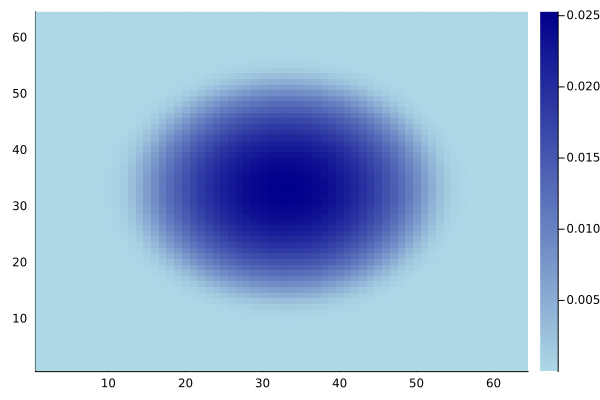

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)